## Exploratory Data Analisys
### Derecha Diario

### Load tokens

In [1]:
import pandas as pd

In [2]:
token_df = pd.read_pickle('tokens/topic_tokens_der.pkl')

In [3]:
token_df.sample(5)

,topics,abajo,abandonara,abandone,abastecimiento,abatida,abierta,abierto,abismal,abismalesen,...,woyecheszen,xx,yaguarete,york,ypf,yuanes,zamora,zona,zonaprop,zonas
doc4,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc32,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc57,exchange,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc14,inflation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc61,exchange,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,0,0


Get docs by topics

### Count words in/between doc(s)

#### Inflation topics

In [4]:
inflation = token_df[token_df.topics == 'inflation'].drop('topics', axis=1)

In [5]:
def count_words(df):
    top_words = {}
    for column in df.transpose().columns:
        top = df.transpose()[column].sort_values(ascending=False).head(30)
        top_words[column] = list(zip(top.index, top.values))
    return top_words

In [6]:
top_words = count_words(inflation)

In [7]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc1
[('inflacion', 5), ('ano', 4), ('demanda', 4), ('parece', 3), ('pesos', 3), ('largo', 3), ('precios', 3), ('dinero', 3), ('gobierno', 3), ('central', 2), ('inflacionario', 2), ('mas', 2), ('correccion', 2), ('plazo', 2), ('raiz', 2), ('deterioro', 2), ('partir', 2), ('economista', 2), ('refirio', 2), ('hanke', 2), ('aunque', 2), ('confianza', 2), ('guzman', 2), ('cambiaria', 2), ('anual', 2), ('panorama', 2), ('atipico', 2), ('resultado', 2), ('dio', 2), ('realidad', 2)]
-------------
doc2
[('precios', 10), ('aumento', 7), ('fuerte', 6), ('ano', 6), ('noviembre', 6), ('interanual', 5), ('octubre', 5), ('aumentaron', 5), ('inflacion', 4), ('ipc', 4), ('mensual', 4), ('respecto', 4), ('nivel', 4), ('mes', 4), ('aumentos', 3), ('division', 3), ('servicios', 3), ('regulados', 3), ('ademas', 3), ('cuarentena', 3), ('incidencia', 3), ('registro', 3), ('mas', 2), ('respuesta', 2), ('macri', 2), ('promedio', 2), ('baja', 2), ('masiva', 2), ('fin', 2), ('gran', 2)]
-------------
doc3
[('im

### Plot

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [9]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

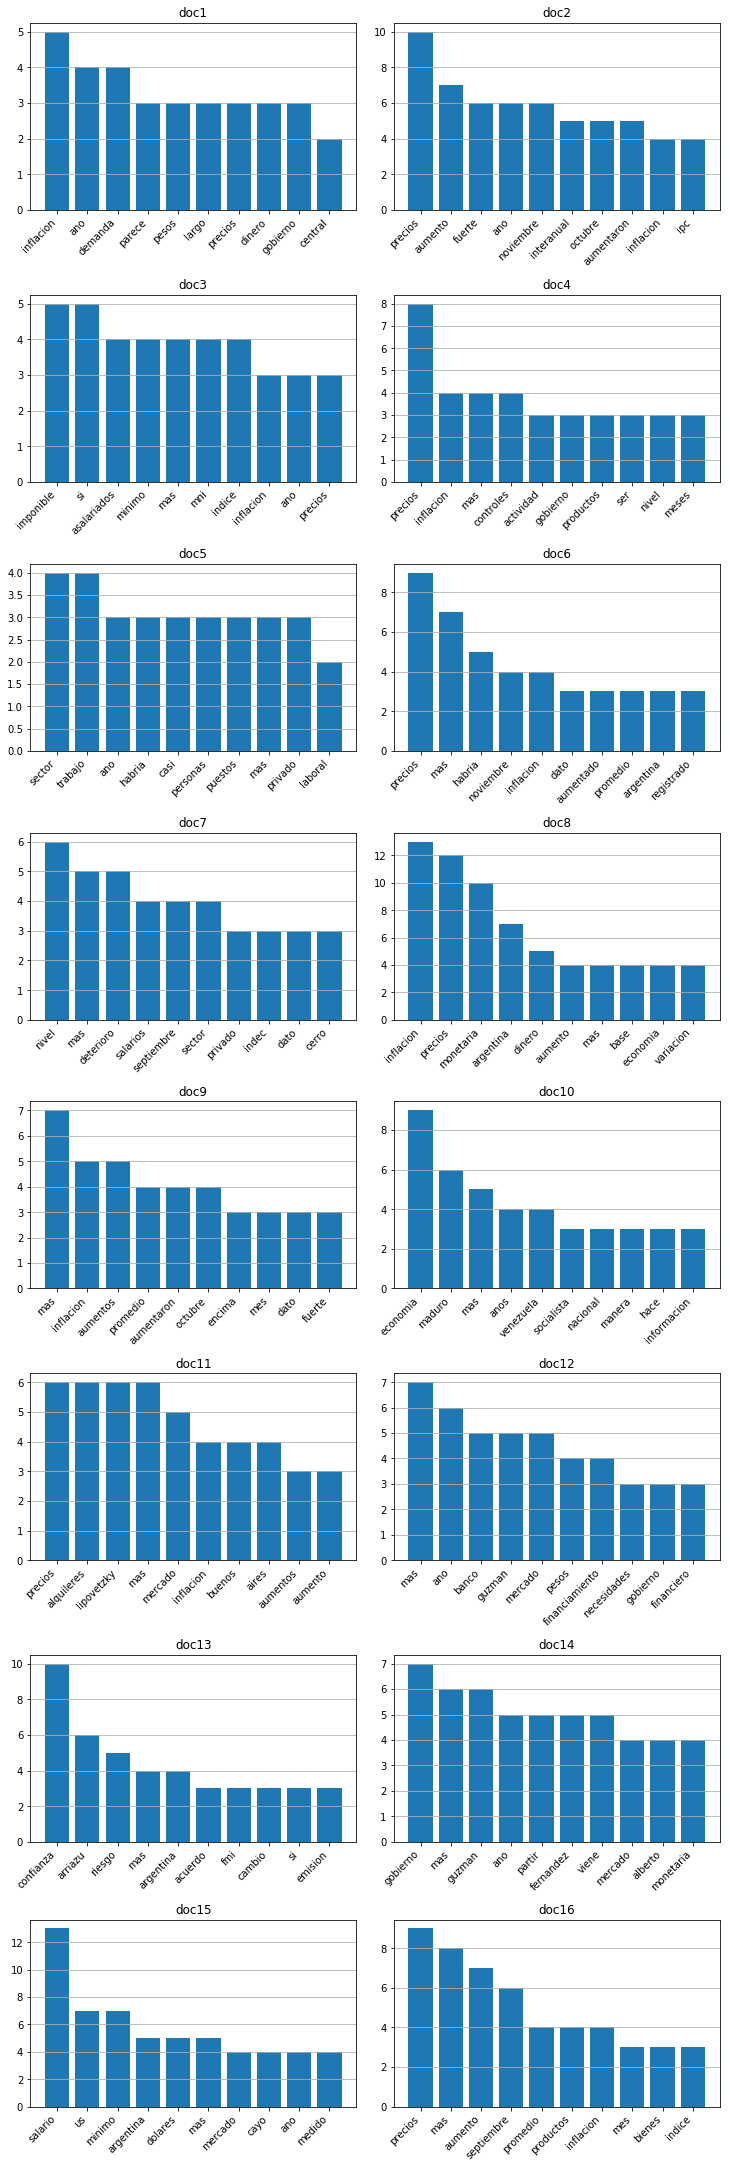

In [10]:
fig, axes = plt.subplots(nrows=8, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [11]:
from collections import Counter

In [12]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [13]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('mas', 35)
('inflacion', 30)
('precios', 24)
('gobierno', 23)
('ano', 20)
('aumento', 17)
('economia', 17)
('si', 15)
('pais', 13)
('nivel', 12)
('mes', 12)
('monetaria', 12)
('dinero', 10)
('argentina', 10)
('emision', 10)
('demanda', 9)
('promedio', 9)
('economica', 9)
('central', 8)
('mercado', 8)
('vez', 8)
('tipo', 8)
('partir', 7)
('economista', 7)
('aumentos', 7)
('indice', 7)
('caida', 7)
('banco', 7)
('aislamiento', 7)
('tambien', 7)
('pesos', 6)
('servicios', 6)
('actividad', 6)
('mismo', 6)
('millones', 6)
('dato', 6)
('general', 6)
('parte', 6)
('medidas', 6)
('fuerte', 5)
('mensual', 5)
('cuarentena', 5)
('gran', 5)
('ser', 5)
('cada', 5)
('alimentos', 5)
('politica', 5)
('bienes', 5)
('pandemia', 5)
('fernandez', 5)


#### Currency exchange topics

In [14]:
exchange = token_df[token_df.topics == 'exchange'].drop('topics', axis=1)

In [15]:
top_words = count_words(exchange)

In [16]:
for doc, words in top_words.items():
    print(f'{doc}\n{list((word, num) for word, num in words)}\n-------------')

doc43
[('dolar', 5), ('empresas', 4), ('importaciones', 4), ('banco', 3), ('central', 3), ('divisas', 3), ('pago', 3), ('segmentos', 2), ('ultimos', 2), ('economia', 2), ('actividad', 2), ('mercados', 2), ('referencia', 2), ('traves', 2), ('vez', 2), ('obligaciones', 2), ('cada', 2), ('tiempo', 2), ('imposibilidad', 2), ('alternativos', 2), ('ano', 2), ('restricciones', 2), ('oficiales', 2), ('mas', 2), ('gran', 2), ('preve', 2), ('largo', 2), ('dolares', 2), ('gobierno', 2), ('parte', 1)]
-------------
doc44
[('inflacion', 10), ('mobius', 6), ('hoy', 4), ('pais', 3), ('anual', 3), ('hanke', 3), ('libro', 3), ('dia', 3), ('economia', 3), ('argentina', 3), ('indec', 3), ('metodologia', 2), ('actual', 2), ('economista', 2), ('estimacion', 2), ('ano', 2), ('mayor', 2), ('recomendaciones', 2), ('unica', 2), ('problemas', 2), ('problema', 2), ('si', 2), ('analisis', 2), ('moderna', 2), ('ultimos', 2), ('nivel', 2), ('cifra', 2), ('internacional', 2), ('sino', 2), ('ejecutivo', 2)]
---------

### Plot

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [18]:
words_graph = [dict(top_words[key][:10]) for key in top_words]

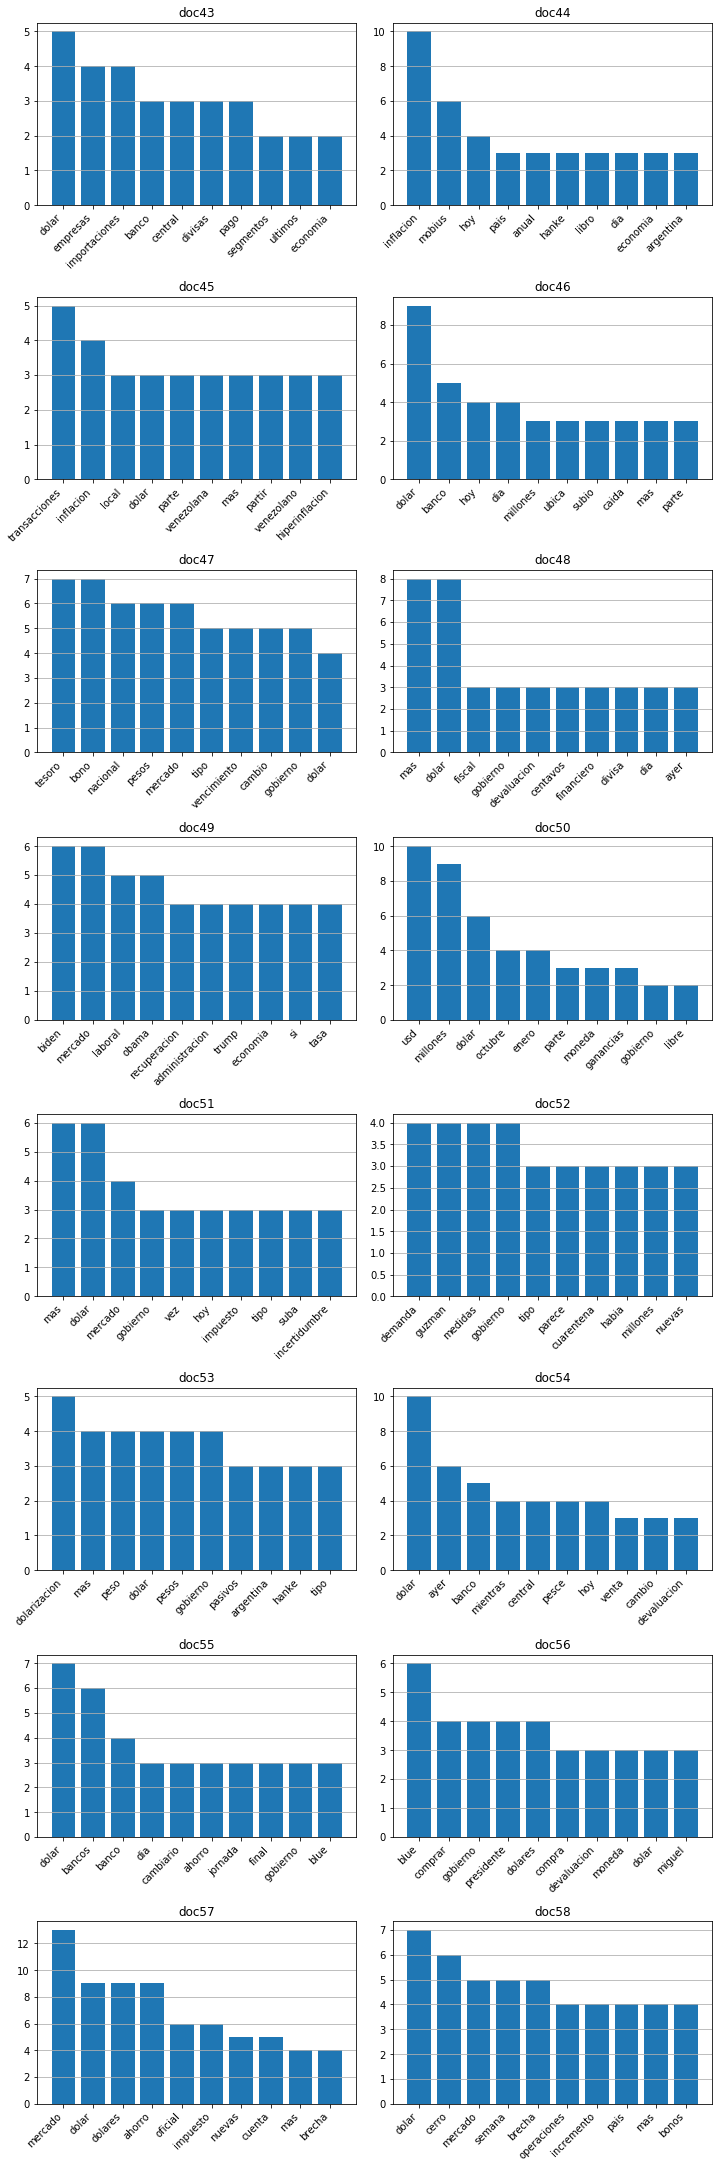

In [19]:
fig, axes = plt.subplots(nrows=8, ncols=2, constrained_layout=True, figsize=(10,30))

for index, (doc, ax) in enumerate(zip(words_graph, axes.flatten())):
    ax.bar(doc.keys(), doc.values())
    ax.grid(axis='y')
    ax.set_xticklabels(doc.keys(), rotation=45, ha='right')
    ax.set_title(list(top_words.keys())[index])

plt.xticks(rotation=45)
plt.show()

Check how many times the words are repeated amid the documents of the same topic

In [20]:
words = []
for docs, w_counts in top_words.items():
    for word in list(word for word, num in w_counts):
        words.append(word)        

In [21]:
for word_count in Counter(words).most_common()[:50]:
    print(word_count)

('dolar', 21)
('mas', 18)
('gobierno', 17)
('tipo', 16)
('mercado', 16)
('banco', 12)
('pesos', 12)
('oficial', 12)
('pais', 11)
('cambio', 11)
('central', 10)
('economia', 10)
('millones', 10)
('dolares', 9)
('medidas', 9)
('hoy', 8)
('vez', 7)
('parte', 7)
('moneda', 7)
('monetaria', 6)
('us', 6)
('paralelo', 6)
('guzman', 6)
('blue', 6)
('habia', 6)
('brecha', 6)
('bcra', 6)
('cada', 5)
('dia', 5)
('argentina', 5)
('si', 5)
('ayer', 5)
('impuesto', 5)
('cambiario', 5)
('cambiaria', 5)
('bancos', 5)
('importaciones', 4)
('divisas', 4)
('ano', 4)
('gran', 4)
('caso', 4)
('semana', 4)
('libre', 4)
('devaluacion', 4)
('cuarentena', 4)
('presidente', 4)
('valor', 4)
('ahorro', 4)
('aunque', 4)
('actividad', 3)


There are not a significant number of word repetions among documents. Therefore, the only ones to be erase would be those who habe no contextual meaning.

In [22]:
more_stop_words = ['dia', 'mes','dias', 'hoy', 'mas','ano','habia','aunque','si']

In [23]:
inflation.drop(more_stop_words, axis=1, inplace=True)

In [24]:
exchange.drop(more_stop_words, axis=1, inplace=True)

Tokens update

In [25]:
tokens_new = token_df.drop(more_stop_words, axis=1)

In [26]:
tokens_new.to_pickle('tokens/topic_tokens_der_new.pkl')

### Visual Representation
#### Words Frequency

In [27]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pickle

In [28]:
data = pickle.load(open('data/df_clean_der.pkl','rb'))

In [29]:
df_inflation = data.loc[data.topics == 'inflation', 'body'].values
df_exchange = data.loc[data.topics == 'exchange', 'body'].values

In [30]:
stopwords_sp = stopwords.words('spanish')
stopwords_sp = stopwords_sp + more_stop_words

In [31]:
plt.rcParams['figure.figsize'] = [16 , 30]
cloud = WordCloud(stopwords=stopwords_sp, background_color='white')

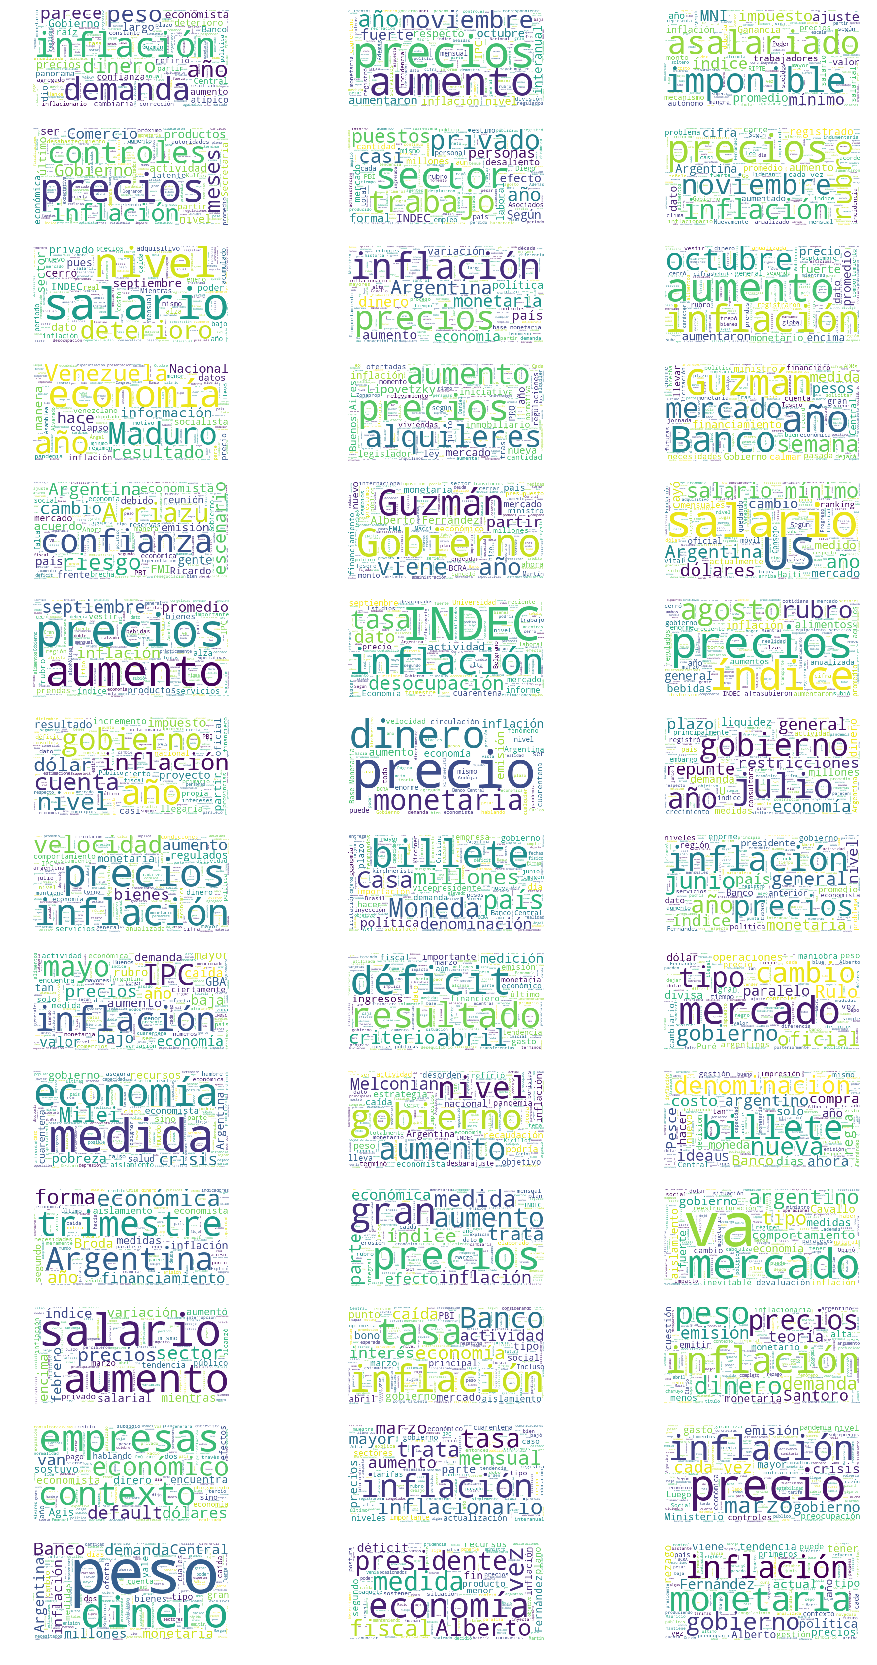

In [33]:
for index, doc in enumerate(df_inflation):
    cloud.generate(doc)
    plt.subplot(14, 3, index + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()    

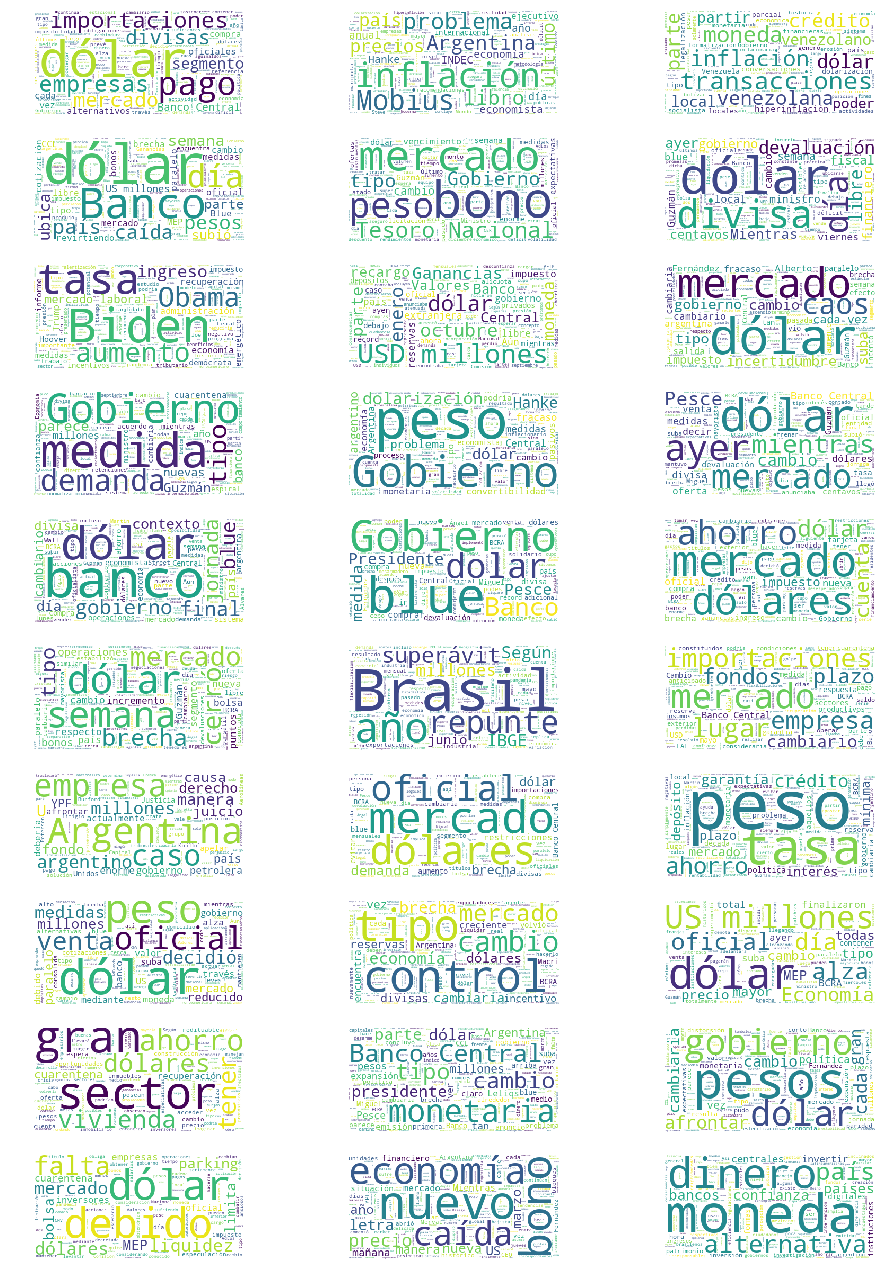

In [34]:
for index, doc in enumerate(df_exchange):
    cloud.generate(doc)
    plt.subplot(13, 3, index + 1)
    plt.imshow(cloud)
    plt.axis('off')
    
plt.show()    